In [ ]:
#используется для работы с массивами
import numpy as np

#библиотека для визуализации данных
import matplotlib.pyplot as plt

#команда, позваляющая выводить изображения прямо в блокнот
%matplotlib inline

#фреймворк для работы и обучения ИНС
import tensorflow as tf

#API для создания и обучения нейронных сетей с использованием фреймворка Keras
from tensorflow import keras

#содержит наборы данных для практического использования в обучении моделей
from tensorflow.keras.datasets import mnist

#представляет собой последовательную модель нейронной сети
from tensorflow.keras.models import Sequential

#Dense представляет собой полносвязный слой нейронной сети
from tensorflow.keras.layers import Dense

#######################################
### библиотеки для работы с данными ###
#######################################

#библиотека алгоритмов компьютерного зрения и обработки изображений.
import cv2

#основной класс для работы с изображениями
from PIL import Image

#модуль, позволяющий конвертацию изображения в градации серого
from PIL import ImageOps

# модуль, содержащий классы для улучшения изображений
from PIL import ImageEnhance

#модуль, предоставляющий методы для загрузки и скачивания файлов
from google.colab import files

#модуль, предоставляющий методы для подключения к Google Drive
from google.colab import drive

#позволяет считывать названия файлов по шаблонам
import glob

#позволяет выполнять различные операции, такие как управление файлами и директориями
import os

#позволяет загружать модели
from tensorflow.keras.models import load_model

In [ ]:
#метод добавления шума "соль - перец"
def salt_pepper_noise(image, salt_prob, pepper_prob):
    # Получает размеры изображения
    row, col = image.shape
    # Создает копию изображения
    noisy = image.copy()
    # Применяет шум "соль"
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords] = 1
    # Применяет шум "перец"
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords] = 0
    return noisy

In [ ]:
#метод добавления Гауссовского шума
def add_gaussian_noise(image):
    #получает размеры изображения
    row, col = image.shape
    #коэффициент среднего значения распределения
    mean = 0.1
    #коэффициент дисперсии распределения, который определяет степень разброса значений
    var = 0.2
    #стандартное отклонение распределения
    sigma = var ** 0.5
    #применение шума к изображению
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.zeros(image.shape, np.float32)
    noisy = image + gauss
    return noisy

In [ ]:
#загрузка изображений из БД MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#добавление названий классов
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#применение метода "соль - перец" для изображений из БД
salt_prob = 0.04
pepper_prob = 0.02

x_train_noisy = np.array([salt_pepper_noise(x, salt_prob, pepper_prob) for x in x_train])
x_test_noisy = np.array([salt_pepper_noise(x, salt_prob, pepper_prob) for x in x_test])

#применение метода добавления Гауссовского шума для изображений из БД
x_train_noisy = np.array([add_gaussian_noise(x) for x in x_train_noisy])
x_test_noisy = np.array([add_gaussian_noise(x) for x in x_test_noisy])

x_train_noisy = x_train_noisy / 255
x_test_noisy = x_test_noisy / 255

<ipython-input-2-5108defec7ef>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy[coords] = 1
<ipython-input-2-5108defec7ef>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy[coords] = 0


Нормализация данных

In [ ]:
#изменение значений серого в пределы от 0 до 1
x_train = x_train / 255
x_test = x_test / 255

Вывод изображений обучающего набора

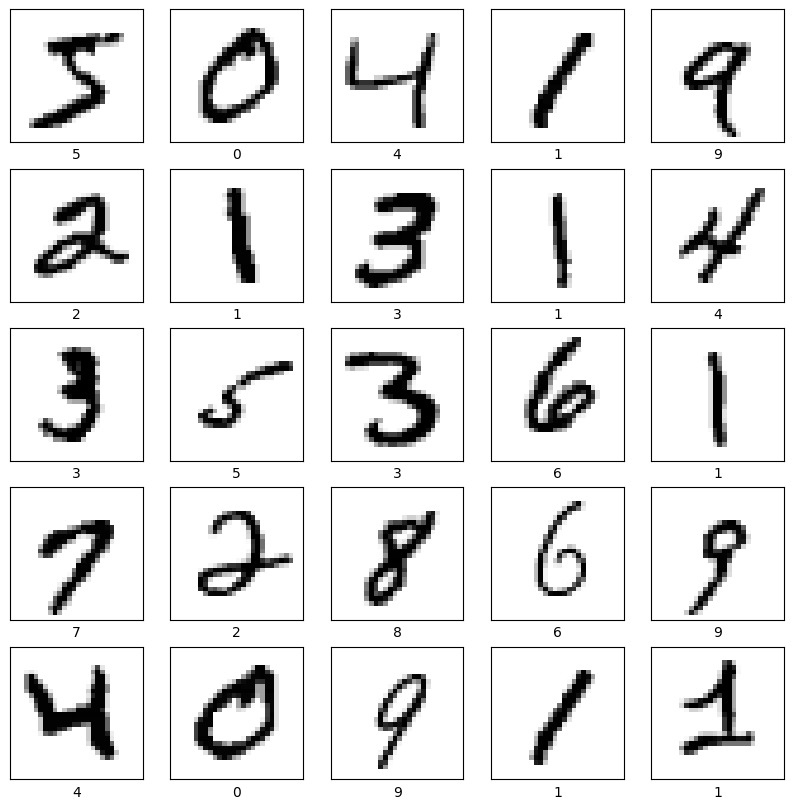

In [ ]:
#визуализация изображений из БД
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

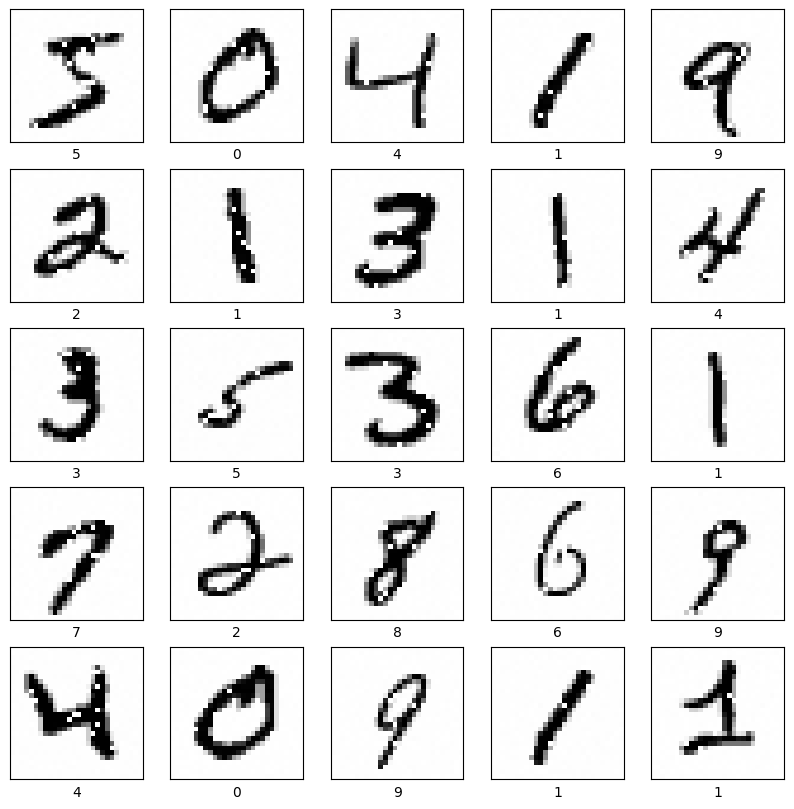

In [ ]:
#визуализация изображений из БД с добавленным шумом
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_noisy[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

Синтез ИНС

In [ ]:
#вызов метода создания ИНС с заданнием кол-ва нейронов и слоев
model = keras.Sequential ([
                           keras.layers.Flatten (input_shape=(28,28)),
                           keras.layers.Dense (256, activation="relu"),
                           keras.layers.Dense (128, activation="relu"),
                           keras.layers.Dense (10, activation="softmax")
                         ])

In [ ]:
#вызов метода обучения ИНС
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Параметры ИНС

In [ ]:
#визуализация параметров ИНС
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Обучение ИНС по эпохам

In [ ]:
#вызов метода обучения ИНС по эпохам
model.fit(x_train_noisy, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6417 - accuracy: 0.8321
Epoch 2/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3015 - accuracy: 0.9129
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2476 - accuracy: 0.9285
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2120 - accuracy: 0.9393
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1853 - accuracy: 0.9470
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1641 - accuracy: 0.9531
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1468 - accuracy: 0.9582
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1327 - accuracy: 0.9620
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1203 - accuracy: 0.9663
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0

Проверка точности ИНС на тестовом наборе данных

In [ ]:
#выводит значение точности модели в отношении к тестовому набору
test_loss, test_acc = model.evaluate(x_test_noisy, y_test)
print('Точность теста: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9691
Точность теста:  0.9690999984741211


In [ ]:
#подключает облачный диск Google Drive
#drive.mount('/content/gdrive')

#Сохраняет модель на облачном диске
#model.save('/content/gdrive/MyDrive/Colab Notebooks/my_model_clean.h5')

In [ ]:
#загружает готовую модель ИНС
model = load_model('/content/drive/MyDrive/Colab Notebooks/my_model_70per.h5')

In [ ]:
#пример создания собственного набора тестовых данных

#в этой матрице будут храниться массивы изображений
image_list = []
#в этом векторе будут храниться метки для каждого изображения
label_list = []

#цикл обработки и добавления в набор каждого изображения типа .png в обозначенной директории
for filename in glob.glob('/content/drive/MyDrive/Colab Notebooks/custom_dataset/Rdy_Img/*.png'):

    #добавление изображения в переменную im
    im = Image.open(filename)
    #конвертация изображения в оттенки серого
    im = im.convert('L')
    #увеличение контраста для снижения шумов
    enhancer = ImageEnhance.Contrast(im)
    im = enhancer.enhance(2)
    #сохранение изображения и конвертация в массив
    im.save ('/content/123.png')
    im = cv2.imread('/content/123.png', 0)
    #добавление медианного размытия для снижения шумов
    im = cv2.medianBlur(im,1)
    #сохранение изображения из массива
    im = Image.fromarray(im)
    #повторное увелечение контраста
    enhancer = ImageEnhance.Contrast(im)
    im = enhancer.enhance(8.2)
    #изменение изображений в нужное разрешение с применением сглаживания
    im = im.resize((28, 28), Image.ANTIALIAS)
    enhancer = ImageEnhance.Contrast(im)
    im = enhancer.enhance(2.6)
    #инвертирует цвета (белый в чёрный и наоборот)
    im = ImageOps.invert(im)
    #нормализация
    im = np.array(im) / 255.0

    # получает имя файла
    base = os.path.basename(filename)
    # разделяет имя файла на имя и расширение и преобразуем имя в целое число
    label = int(os.path.splitext(base)[0])
    label_list.append(label)
    image_list.append(im)


X = np.array(image_list)
Y = np.array(label_list)

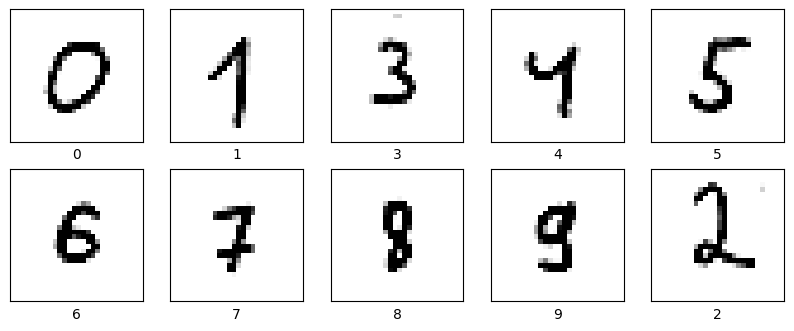

In [ ]:
#визуализация изображений из собственного набора
plt.figure(figsize=(10,10))
for i in range (10):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[Y[i]])

In [ ]:
test_loss, test_acc = model.evaluate(X, Y)
print('Точность теста: ', test_acc)

1/1 [==============================] - 0s 158ms/step - loss: 1.5277 - accuracy: 0.6000
Точность теста:  0.6000000238418579


In [ ]:
# Предсказание вероятностей классов для тестового набора
predictions = model.predict(X)

# Печать вероятностей
for i, prediction in enumerate(predictions):
    print(f'Изображение {i+1}, метка класса: {Y[i]}')
    print("Предсказание класса:", np.argmax(prediction))  # выведет предсказанную цифру
    print("С веротностью: {}%".format(round(np.max(prediction)*100, 2)))
    print('---------------------------------')

1/1 [==============================] - 0s 66ms/step
Изображение 1, метка класса: 0
Предсказание класса: 0
С веротностью: 64.86%
---------------------------------
Изображение 2, метка класса: 1
Предсказание класса: 1
С веротностью: 81.04%
---------------------------------
Изображение 3, метка класса: 3
Предсказание класса: 2
С веротностью: 74.66%
---------------------------------
Изображение 4, метка класса: 4
Предсказание класса: 4
С веротностью: 98.7%
---------------------------------
Изображение 5, метка класса: 5
Предсказание класса: 5
С веротностью: 92.16%
---------------------------------
Изображение 6, метка класса: 6
Предсказание класса: 4
С веротностью: 75.02%
---------------------------------
Изображение 7, метка класса: 7
Предсказание класса: 7
С веротностью: 49.62%
---------------------------------
Изображение 8, метка класса: 8
Предсказание класса: 1
С веротностью: 44.77%
---------------------------------
Изображение 9, метка класса: 9
Предсказание класса: 1
С веротностью: 